# Hinge Monte Carlo Analysis

Jypyter NoteBook demonstrates the execution of the **HingeMonteCarloAnalysis** simulation sample.<br>

To install the pyST.zip use the following command: <code>$ pip install pyST.zip<code>

To run this NoteBook, follow the provided steps:<br>
**Step 1:** Create a client by providing the TWC server, user name and password. <br>
<code>client = SimulationWebClient('TWC_server', 'user_name', 'user_psw', verifySSL=False)</code><br>
<i>Note: If 'user_psw' is not entered, an input field is provided to enter a password.</i>

In [5]:
# Disable SSL warnings
import urllib3
import json
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [6]:
# Create client
from pyST import SimulationWebClient

client = SimulationWebClient('<enter TWC server>', '<enter user name>', '<enter password>', verifySSL=False)

**Step 2:** Add the **HingeMonteCarloAnalysis** simulation project to the TWC server.<br>

**Step 3** Run the following cells.<br><br>
<i>Note: **Simulate()** starts a simulation and returns its results.</i><br>
<code>simulate('project', config='config', version='version', branch='branch', element_id='element_id', commit_results='True/False', verification='All/None/Fail', data=json.dumps('param'))</code>

In [9]:
# Run simulation

result = client.simulate('HingeMonteCarloAnalysis_Jupyter', config='Monte Carlo Analysis')
csv = result['csvExports']['clearance']

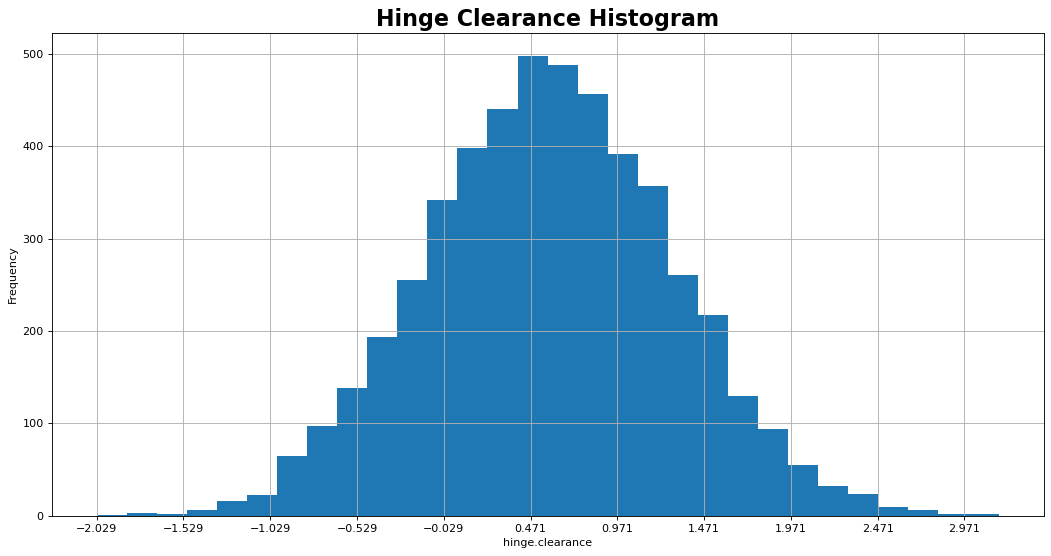

In [24]:
# Draw a histogram based on CSV data

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from io import StringIO

x = np.loadtxt(StringIO(csv), dtype='double', delimiter=',', skiprows = 1, usecols = (0))
numberOfBins = 30

figure(figsize=(16, 8), dpi=80)
plt.hist(x, bins = numberOfBins)
plt.xlabel('hinge.clearance')
plt.ylabel('Frequency')
plt.title('Hinge Clearance Histogram', fontweight="bold", fontsize=20)
plt.xticks(np.arange(min(x), max(x), 0.5))
plt.grid()
plt.show()